In [4]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
n = 600
m = 3*n
eps = 0.0
par_mu = 0
par_sd = np.sqrt(1)
out_mu = 5
out_sd = np.sqrt(1)
par_reg = 0.01
true_alpha = [par_mu, par_sd]

exper_iter = 10 #デバッグ後変える
mm_iter = 500
L = 2
learn_par = 0.1
dicay_par = 0.5

def sigmoid(x):
    return 1/(np.exp(-x) + 1)

def deriv_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def g_up(t, s):
    return sigmoid(s) + deriv_sigmoid(s)*(t-s) + (t-s)**2/20

def g_lo(t, s):
    return sigmoid(s) + deriv_sigmoid(s)*(t-s) - (t-s)**2/20

In [19]:
res = [0 for i in range(exper_iter)]
for i in range(exper_iter):

    eps += 0.1/exper_iter

    print("%d/%d" %(i+1, exper_iter))
    data = np.random.normal(loc = par_mu, scale = par_sd, size = int(n*(1-eps)))
    contamination = np.random.normal(loc = out_mu, scale = out_sd, size = (n - int(n*(1-eps))))
    data = np.concatenate([data, contamination])
    np.random.shuffle(data)
    alpha_hist = []
    alpha = np.array([np.mean(data), np.std(data)**2])
    for j in range(1, mm_iter+1):
        z = np.random.normal(loc=alpha[0], scale=np.sqrt(alpha[1]), size = m)
        def major_func(par, past_par):
            new_beta = par[0:2]; new_b = par[2]; beta = past_par[0:2]; b = past_par[2]
            A = np.mean(g_lo(np.dot(np.stack([z, z**2], axis=1),new_beta) - new_b, np.dot(np.stack([z, z**2], axis=1),beta) - b))
            B = np.mean(g_lo(np.dot(np.stack([data, data**2], axis=1),new_beta) - new_b, np.dot(np.stack([data, data**2], axis=1),beta) - b))
            reg = par_reg*np.sum(np.sqrt(par**2))
            return -(A-B) + reg
        l = 0; par = np.random.normal(scale = 0.1, size = 3)
        while(l<L):
            op = minimize(major_func, x0 = np.zeros(3), args = par)
            par = op.x
            l+=1
        # ここから下よくわからん
        alpha_m = alpha[0]; alpha_v = alpha[1]
        # 分散をてきとーになおしてみた
        #mgrad = np.stack([(z-alpha_m)/alpha_v, ((z-alpha_m)**2)/(2*alpha_v)-alpha_v], axis = 1)
        mgrad = np.stack([(z-alpha_m)/alpha_v, ((z-alpha_m)**2-alpha_v)/(2*alpha_v)], axis = 1)
        sig_ = sigmoid(np.dot(np.stack([z, z**2], axis=1),par[0:2])- par[2])[:,np.newaxis]

        tmp_alpha = alpha*(1-learn_par*par_reg*0.1) - learn_par/j**dicay_par * np.mean(mgrad*sig_, axis = 0)
        discount = 0.5; cnt = 1
        while tmp_alpha[1] < 0:
            tmp_alpha = alpha - learn_par/j**dicay_par * discount**cnt * np.mean(mgrad*sig_, axis = 0)
            cnt +=1
        
        alpha = tmp_alpha
        alpha_hist.append(alpha)
    res[i] = alpha_hist



1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


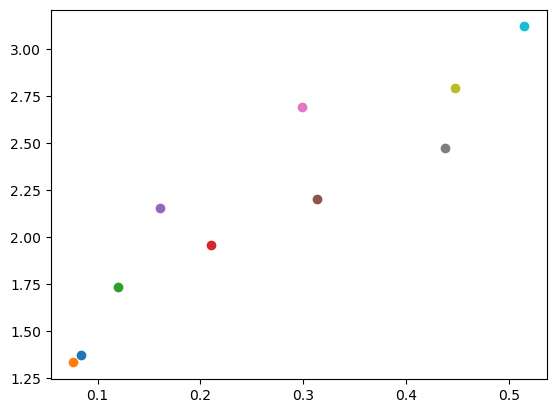

In [20]:
# change eps 0.01 to 0.1
npres = np.array(res)
for i in range(npres.shape[0]):
    plt.scatter(npres[i][-1][0], npres[i][-1][1])
plt.savefig("experiment/fix_SGD_and_tune_lambda.png")

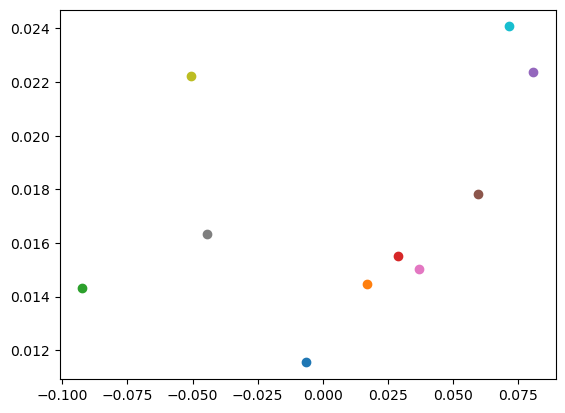

In [15]:
# change eps 0.01 to 0.1
npres = np.array(res)
for i in range(npres.shape[0]):
    plt.scatter(npres[i][-1][0], npres[i][-1][1])
plt.savefig("experiment/fix_SGD.png")

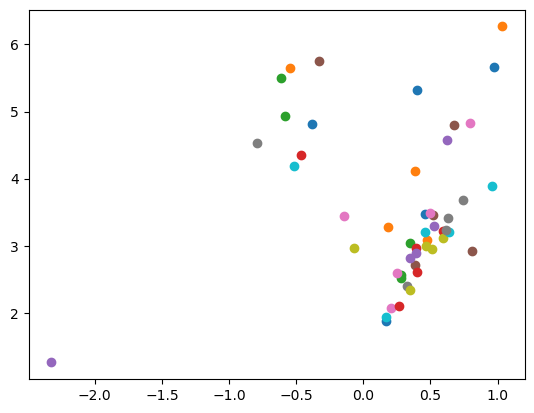

In [10]:
# change eps 0.01 to 0.1
npres = np.array(res)
for i in range(npres.shape[0]):
    plt.scatter(npres[i][-1][0], npres[i][-1][1])
plt.savefig("experiment/change_eps_001_to_01_50iter.png")

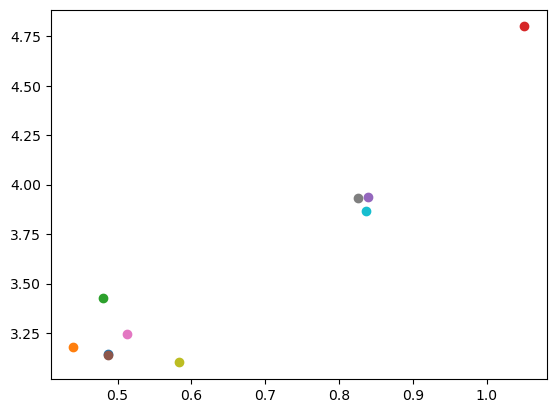

In [32]:
# n = 600
npres = np.array(res)
for i in range(npres.shape[0]):
    plt.scatter(npres[i][-1][0], npres[i][-1][1])
plt.savefig("experiment/n=600.png")

In [10]:
npres = np.array(res)[0]
half = int(mm_iter/2)
x = npres[:, 0][:half]; y=npres[:,1][:half]
plt.scatter(x,y)
x = npres[:, 0][half:]; y=npres[:,1][half:]
plt.scatter(x,y, color ="m")

array([0.12473649, 0.81620839])

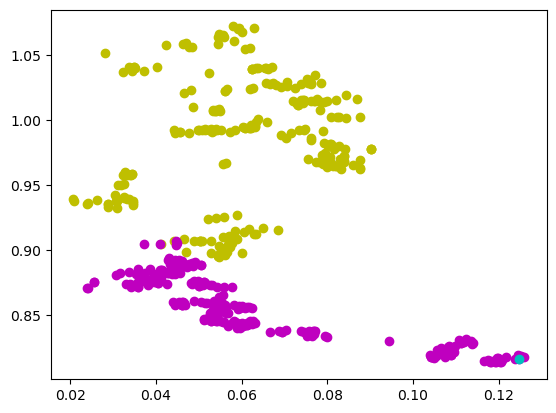

In [12]:
npres = np.array(res)[0]
half = int(mm_iter/2)
x = npres[:, 0][:half]; y=npres[:,1][:half]
plt.scatter(x,y, color = "y")
x = npres[:, 0][half:]; y=npres[:,1][half:]
plt.scatter(x,y, color ="m")
plt.scatter(x[-1], y[-1], color = "c")

# regなし

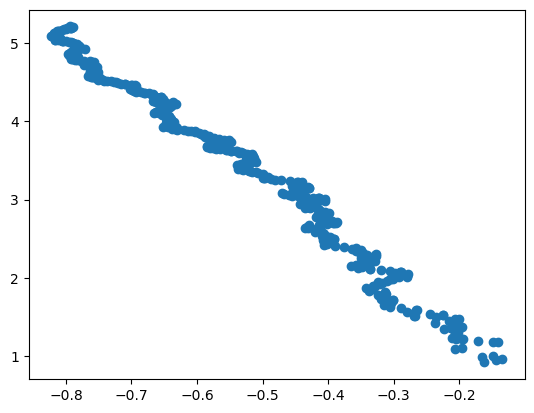

In [96]:
npres= np.array(res)[0]
x = npres[:, 0]; y=npres[:,1]
plt.scatter(x,y)

# regあり

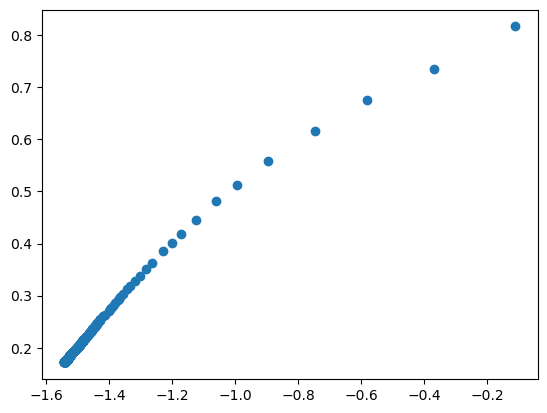

In [ ]:
res = np.array(res)[0]
x = res[:, 0]; y=res[:,1]
plt.scatter(x,y)

In [17]:
npres.shape

(10, 500, 2)

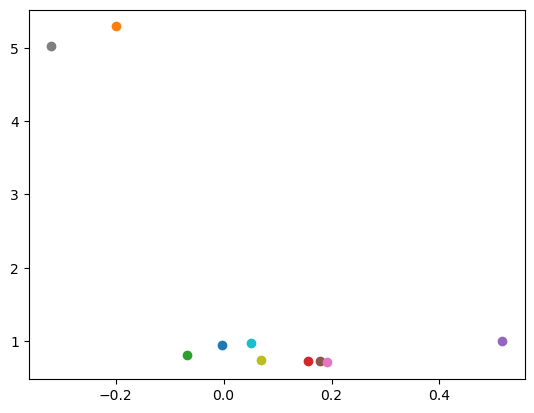

In [20]:
npres = np.array(res)
for i in range(npres.shape[0]):
    plt.scatter(npres[i][-1][0], npres[i][-1][1])